In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import sys

plt.style.use("ggplot")

def import_data():
    cov19 = pd.read_csv("source/specimenDate_ageDemographic-unstacked.csv", parse_dates=["date"])
    cov19["Total positive cases"] = cov19["newCasesBySpecimenDate-0_59"]
    
    # Distribution by age group
    cov19["kids"] = cov19["newCasesBySpecimenDate-0_4"] + cov19["newCasesBySpecimenDate-5_9"]
    cov19["Teens"] = cov19["newCasesBySpecimenDate-10_14"] + cov19["newCasesBySpecimenDate-15_19"] + cov19["newCasesBySpecimenDate-20_24"]
    cov19["Folks"] = cov19["newCasesBySpecimenDate-25_29"] + cov19["newCasesBySpecimenDate-30_34"] + cov19["newCasesBySpecimenDate-35_39"] + cov19["newCasesBySpecimenDate-40_44"] + cov19["newCasesBySpecimenDate-45_49"] + cov19["newCasesBySpecimenDate-50_54"] + cov19["newCasesBySpecimenDate-55_59"]
    cov19["Grand-peeps"] = cov19["newCasesBySpecimenDate-60_64"] + cov19["newCasesBySpecimenDate-65_69"] + cov19["newCasesBySpecimenDate-70_74"] + cov19["newCasesBySpecimenDate-75_79"] + cov19["newCasesBySpecimenDate-80_84"] + cov19["newCasesBySpecimenDate-85_89"] + cov19["newCasesBySpecimenDate-90+"] 

    # Date into Months and weeks
    cov19["Month"] = cov19["date"].dt.month_name()
    cov19["Week"] = cov19["date"].dt.isocalendar().week

    # location
    cov19["Location"] = cov19["areaName"]

    #Final data
    cov19 = cov19[["Total positive cases", "kids", "Folks", "Grand-peeps", "date", "Week", "Month", "Location"]]

    #sort by date
    cov19.sort_values(by = "date")
    
    return cov19

cov19 = import_data()
sys.modules[__name__] = cov19

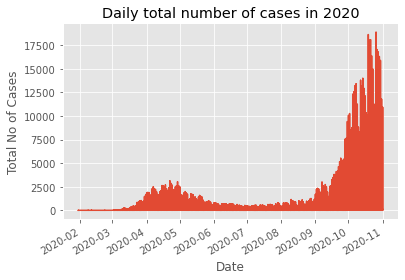

In [62]:
# Daily total number of cases in 2020

filtered_cov19 = cov19.set_index("date")
filtered_cov19["Total positive cases"].plot()
plt.title("Daily total number of cases in 2020")
plt.ylabel("Total No of Cases")
plt.xlabel("Date")
plt.show()

Total positive cases                   1828
kids                                     25
Folks                                  1693
Grand-peeps                            2272
date                    2020-04-01 00:00:00
Week                                     14
Month                                 April
Name: England, dtype: object


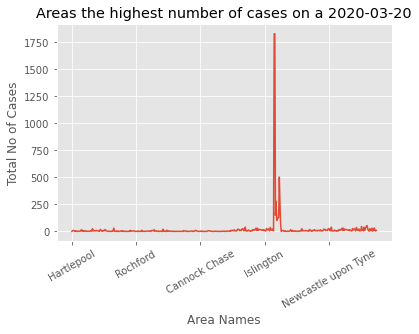

In [63]:
#Areas the highest number of cases on a 2020-01-01
day = "2020-04-01"
filtered_cov19 = cov19[cov19["date"] == day]
filtered_cov19 = filtered_cov19.set_index("Location")
print(filtered_cov19.loc[filtered_cov19["Total positive cases"].idxmax()])
filtered_cov19["Total positive cases"].plot()
plt.title("Areas with the highest number of cases on the 2020-03-20")
plt.ylabel("Total No of Cases")
plt.xlabel("Area Names")
plt.xticks(rotation=30)

plt.show()

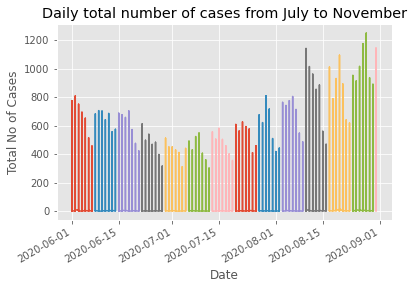

In [64]:
# Daily total number of cases in summer months of 2020
filtered_cov19 = cov19[(cov19['date'] >= '2020-06-01') & (cov19['date'] <= '2020-08-31')]

filtered_cov19 = filtered_cov19.set_index("date")
filtered_cov19["Total positive cases"].resample('W').plot()
plt.title("Daily total number of cases from July to November")
plt.ylabel("Total No of Cases")
plt.xlabel("Date")
plt.show()

<AxesSubplot:title={'center':'Total Cases in Adur'}, xlabel='date'>

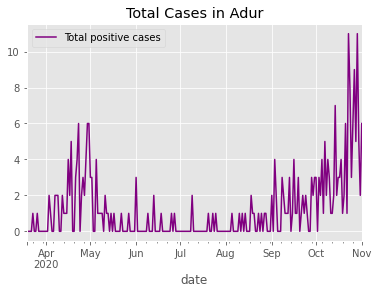

In [65]:
cov19_data_York = cov19.loc[cov19['Location']=="Adur"]
cov19_data_York.plot(kind = "line", x = "date", y = "Total positive cases", title = "Total Cases in Adur", color = "purple")

<AxesSubplot:title={'center':'Total Cases in London'}, xlabel='date'>

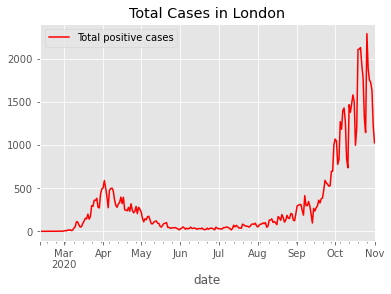

In [66]:
cov19_data_london = cov19.loc[cov19['Location']=="London"]
cov19_data_london.plot(kind = "line", x = "date", y = "Total positive cases", title = "Total Cases in London", color = "red")

<AxesSubplot:title={'center':'Total Cases in Liverpool'}, xlabel='date'>

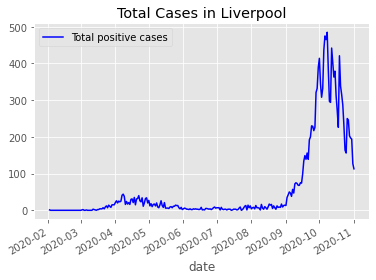

In [67]:
cov19_data_liverpool = cov19.loc[cov19['Location']=="Liverpool"]
cov19_data_liverpool.plot(kind = "line", x = "date", y = "Total positive cases", title = "Total Cases in Liverpool", color = "blue")

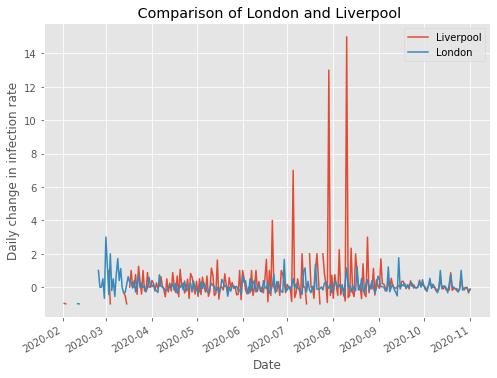

In [68]:
# Comparison of London and liverpool
cov19["Daily percentage Change"] = cov19["Total positive cases"].pct_change()

# filter by date
filtered_cov19 = cov19[(cov19['date'] >= '2020-02-01') & (cov19['date'] <= '2020-11-08')]
filtered_cov19 = filtered_cov19.set_index("date")

# Area list
areas = ["London","Liverpool"]
filtered_cov19 = filtered_cov19[filtered_cov19['Location'].isin(areas)]

# group by area
fig, ax = plt.subplots(figsize=(8,6))
for label, sample_cov19 in filtered_cov19.groupby('Location'):
    sample_cov19["Daily percentage Change"].plot(kind="line", ax=ax, label=label)
plt.legend()

plt.title(" Comparison of London and Liverpool")
plt.ylabel("Daily change in infection rate")
plt.xlabel("Date")
plt.show()

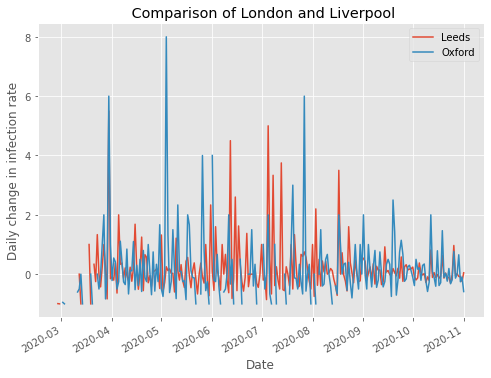

In [69]:
# Comparison of London and liverpool
cov19["Daily percentage Change"] = cov19["Total positive cases"].pct_change()

# filter by date
filtered_cov19 = cov19[(cov19['date'] >= '2020-02-01') & (cov19['date'] <= '2020-11-08')]
filtered_cov19 = filtered_cov19.set_index("date")

# Area list
areas = ["Leeds","Oxford"]
filtered_cov19 = filtered_cov19[filtered_cov19['Location'].isin(areas)]

# group by area
fig, ax = plt.subplots(figsize=(8,6))
for label, sample_cov19 in filtered_cov19.groupby('Location'):
    sample_cov19["Daily percentage Change"].plot(kind="line", ax=ax, label=label)
plt.legend()

plt.title(" Comparison of London and Liverpool")
plt.ylabel("Daily change in infection rate")
plt.xlabel("Date")
plt.show()